**This notebook provide the best practices to consume covid-lake API.**

In [1]:
# General Import

import pandas as pd
import numpy as np
import re
import seaborn as sns
from datetime import datetime


#!pip install scipy
import scipy
pearsonr = scipy.stats.pearsonr

import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
%run /home/ubuntu/notebooks/covid-prj01-data-analysis/[UTILS]/dremio-access-new.py

dremio = DremioQueryMakerJDBC()
index = dremio.getIndex()
display(index)

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,VIEW_DEFINITION
0,DREMIO,Covid-Lake,Disease_Indicator,"SELECT createdOn, identifier, valueString, val..."
1,DREMIO,Covid-Lake,hospitalizações,"SELECT * FROM ""hospitalizacoes.csv"""
2,DREMIO,Covid-Lake,Institution,SELECT * FROM logical_entity
3,DREMIO,Covid-Lake,News&Trends,SELECT * FROM logical_entity
4,DREMIO,Covid-Lake,Socioeconomic_Factors,"SELECT createdOn, clean_data_to_FLOAT(valueStr..."
...,...,...,...,...
93,DREMIO,Common Data Model.disease_indicator.wcota.stan...,Observation,"SELECT ""date"" as createdOn, 'wcota' as identif..."
94,DREMIO,Common Data Model.Institutions.hospitals_regis...,Location,"SELECT CO_UNIDADE AS organizationId, \n ..."
95,DREMIO,Common Data Model.Institutions.hospitals_regis...,Organization,"SELECT CO_UNIDADE AS organizationId, CO_CNES A..."
96,DREMIO,Common Data Model.news_trends.google_trends.st...,Observation,"SELECT ""Date"" as createdOn, CAST(Medicamento a..."


In [3]:
list(index['TABLE_NAME'])

['Disease_Indicator',
 'hospitalizações',
 'Institution',
 'News&Trends',
 'Socioeconomic_Factors',
 'brasil_io',
 'cities',
 'fiocruz_infogripe',
 'google_trends',
 'health_ministry',
 'hospitals_dimension',
 'mobility_apple',
 'mobility_google',
 'pebmed',
 'wcota',
 'observations',
 'global_dataset',
 'demandas_dos_consumidores_nip',
 'BDCnewsCOVID',
 'treatedBDCcompanies',
 'treatedBDCpeople',
 'EDUCACAO_BASICA_DOCENTES_CO',
 'EDUCACAO_BASICA_DOCENTES_NORDESTE',
 'EDUCACAO_BASICA_DOCENTES_NORTE',
 'EDUCACAO_BASICA_DOCENTES_SUDESTE',
 'EDUCACAO_BASICA_DOCENTES_SUL',
 'EDUCACAO_BASICA_ESCOLAS',
 'EDUCACAO_BASICA_GESTOR',
 'EDUCACAO_BASICA_MATRICULA_CO',
 'EDUCACAO_BASICA_MATRICULA_NORDESTE',
 'EDUCACAO_BASICA_MATRICULA_NORTE',
 'EDUCACAO_BASICA_MATRICULA_SUDESTE',
 'EDUCACAO_BASICA_MATRICULA_SUL',
 'EDUCACAO_BASICA_TURMAS',
 'ENSINO_SUPERIOR_DM_ALUNOS',
 'cadasto_nacional_de_estabelecimentos_de_saude_cnes',
 'cadasto_nacional_de_estabelecimentos_de_saude_cnes_ativos',
 'cobertura_est

In [4]:
index_table = index['TABLE_NAME'].loc[index['TABLE_NAME'] == 'obitos_cartorio_2019_2020'].index[0]
index_table

74

In [67]:
obitos_cartorio = dremio.getTable(index_table)
obitos_cartorio.head()

,ano,uf,tipo_doenca,local_obito,faixa_etaria(anos),sexo,total
0,2019,AC,outras,domicilio,0 - 9,F,8
1,2019,AC,outras,domicilio,0 - 9,M,15
2,2019,AC,outras,hospital,0 - 9,F,29
3,2019,AC,outras,hospital,0 - 9,M,56
4,2019,AC,outras,ignorado,0 - 9,M,1


In [6]:
obitos_cartorio.shape

(26298, 7)

In [7]:
# Rename date column
#casos_full.columns = []

## exploreEntity

Presents an overview of the tables existing in the covid-lake.

URL: http://23.20.157.201/api/exploreEntity

*Each Table represents a CDM (Common Data Model) because it encompesses a set of dataset collected from different sources and mapped following a standard enitity.*

### Let's play with Data :)

- **Analyzing casos_full dataset**

Checking all columns

In [8]:
all_columns = obitos_cartorio.columns.values.tolist()
print('Total columns:', len(all_columns))

Total columns: 7


In [9]:
all_columns

['ano',
 'uf',
 'tipo_doenca',
 'local_obito',
 'faixa_etaria(anos)',
 'sexo',
 'total']

Verifying all NAs

In [10]:
# count NAs per column
obitos_cartorio.isna().sum()

ano                      0
uf                       0
tipo_doenca              0
local_obito              0
faixa_etaria(anos)    1393
sexo                     0
total                    0
dtype: int64

Dropping all NAs

In [15]:
# remove columns full of NAs
#casos_full.dropna(inplace=True)
#casos_full.head()

In [11]:
#obitos_cartorio.shape

(26298, 7)

Verifying the duplicated columns

In [17]:
# drop duplicates
#casos_full.drop_duplicates() 
# no duplicates

In [18]:
#obitos_cartorio.shape

(751472, 17)

Shows all the data, though it runs quite slow for big datasets

In [19]:
#force_show_all_columns(base_unif)

Describe the dataset

In [12]:
obitos_cartorio.describe()

,total
count,26298.000000
mean,84.663434
std,390.039069
min,1.000000
25%,2.000000
50%,6.000000
75%,32.000000
max,12263.000000


Describe the fields

In [13]:
list(obitos_cartorio['uf'].unique())

['AC',
 'AL',
 'AM',
 'AP',
 'BA',
 'CE',
 'DF',
 'ES',
 'GO',
 'MA',
 'MG',
 'MS',
 'MT',
 'PA',
 'PB',
 'PE',
 'PI',
 'PR',
 'RJ',
 'RN',
 'RO',
 'RR',
 'RS',
 'SC',
 'SE',
 'SP',
 'TO']

Frequency of each state

In [14]:
# array with each count    
counts = np.unique(obitos_cartorio['uf'], return_counts=True)

# dataframe
state_count = pd.DataFrame({'uf': counts[0], 'freq': counts[1]})
state_count.sort_values(by=['freq'], inplace=True,ascending=False)
state_count.head()

,uf,freq
25,SP,1718
10,MG,1463
5,CE,1291
4,BA,1288
15,PE,1271


Descriptive analysis

In [19]:
obitos_cartorio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26298 entries, 0 to 26297
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ano                 26298 non-null  object
 1   uf                  26298 non-null  object
 2   tipo_doenca         26298 non-null  object
 3   local_obito         26298 non-null  object
 4   faixa_etaria(anos)  24905 non-null  object
 5   sexo                26298 non-null  object
 6   total               26298 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.4+ MB


In [22]:
obitos_cartorio['ano'].value_counts()

2020    14055
2019    12239
020         3
019         1
Name: ano, dtype: int64

In [23]:
obitos_cartorio['tipo_doenca'].value_counts()

outras                        7462
insuficiencia_respiratoria    4491
pneumonia                     4434
septicemia                    3929
indeterminada                 2503
covid                         1977
srag                          1502
Name: tipo_doenca, dtype: int64

In [24]:
obitos_cartorio['local_obito'].value_counts()

hospital                 7628
domicilio                5668
outros_servicos_saude    4165
outro                    3574
ignorado                 2344
via_publica              2262
posto_saude               457
ambulancia                153
samu                       47
Name: local_obito, dtype: int64

In [25]:
obitos_cartorio['sexo'].value_counts()

M    13406
F    12182
I      707
         3
Name: sexo, dtype: int64

In [68]:
obitos_cartorio['faixa_etaria(anos)'].value_counts()

70 - 79    2931
80 - 89    2877
60 - 69    2835
50 - 59    2623
90 - 99    2459
40 - 49    2358
30 - 39    2075
0 - 9      1924
20 - 29    1792
> 100      1516
N/I        1515
Name: faixa_etaria(anos), dtype: int64

## Graphs

In [90]:
df = obitos_cartorio.copy()

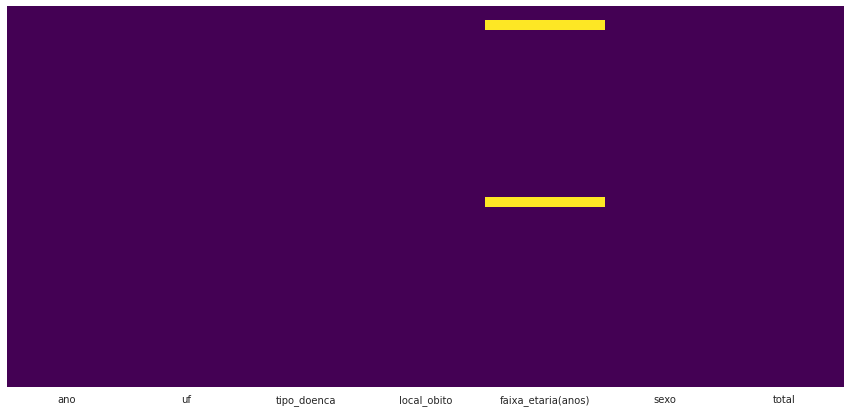

In [91]:
# Missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [92]:
# For more details
display(df.isnull().sum().sort_values(ascending=False))

faixa_etaria(anos)    1393
total                    0
sexo                     0
local_obito              0
tipo_doenca              0
uf                       0
ano                      0
dtype: int64

In [93]:
df['faixa_etaria(anos)'].fillna('N/I', inplace=True)
df['faixa_etaria(anos)'].value_counts()

70 - 79    2931
N/I        2908
80 - 89    2877
60 - 69    2835
50 - 59    2623
90 - 99    2459
40 - 49    2358
30 - 39    2075
0 - 9      1924
20 - 29    1792
> 100      1516
Name: faixa_etaria(anos), dtype: int64

In [94]:
df['ano'].value_counts()

2020    14055
2019    12239
020         3
019         1
Name: ano, dtype: int64

In [95]:
df['ano'].replace('020', '2020', inplace=True)
df['ano'].replace('019', '2019', inplace=True)

In [96]:
df['ano'].value_counts()

2020    14058
2019    12240
Name: ano, dtype: int64

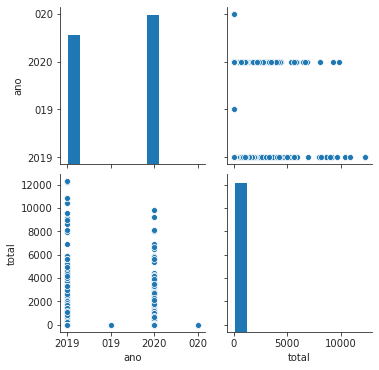

In [29]:
sns.set_style("ticks")
sns.pairplot(df);

In [56]:
# Ajuste tamanho do gráfico
plt.rcParams['figure.figsize'] = (15,7)

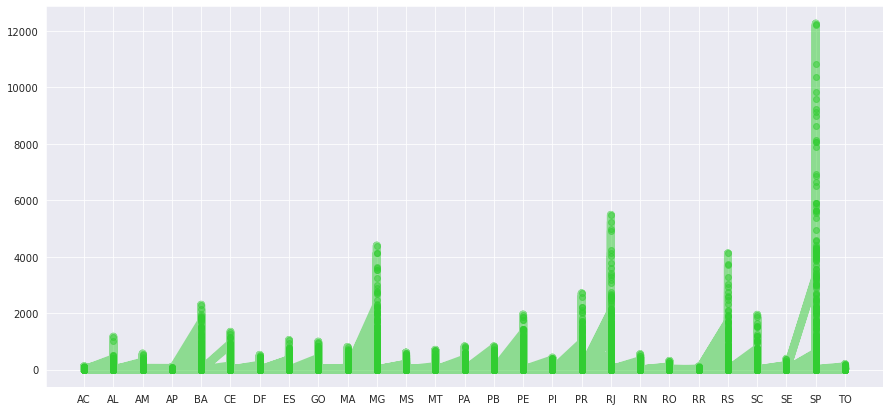

In [57]:
plt.plot(df['uf'], df['total'], color='limegreen', linewidth=8, alpha=0.5, marker='o');

### Cumulated distribution

In [82]:
cumulated_type = df.groupby('tipo_doenca').agg({'total': 'sum'}).reset_index()
cumulated_type

,tipo_doenca,total
0,covid,148245
1,indeterminada,14489
2,insuficiencia_respiratoria,178625
3,outras,1197202
4,pneumonia,370742
5,septicemia,301587
6,srag,15589


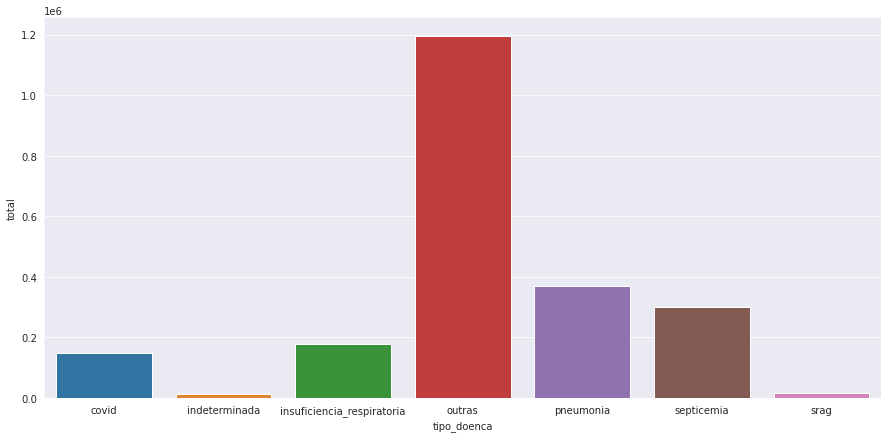

In [83]:
sns.barplot(x="tipo_doenca", y="total", data=cumulated_type);

In [84]:
cumulated_age = df.groupby('faixa_etaria(anos)').agg({'total': 'sum'}).reset_index()
cumulated_age

,faixa_etaria(anos),total
0,0 - 9,74679
1,20 - 29,41302
2,30 - 39,68312
3,40 - 49,127225
4,50 - 59,242717
5,60 - 69,397083
6,70 - 79,480845
7,80 - 89,484615
8,90 - 99,237737
9,> 100,23805


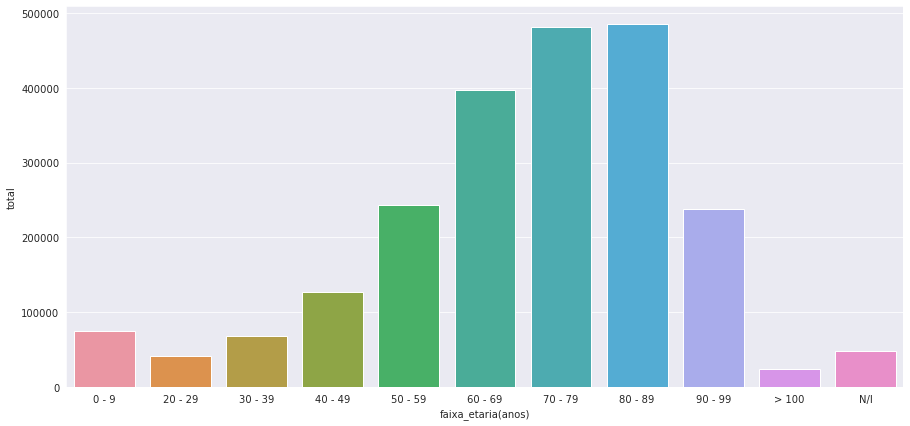

In [85]:
sns.barplot(x="faixa_etaria(anos)", y="total", data=cumulated_age);

In [88]:
cumulated_year = df.groupby(['tipo_doenca', 'ano']).agg({'total': 'sum'}).reset_index()
cumulated_year

,tipo_doenca,ano,total
0,covid,2020,148245
1,indeterminada,2019,6892
2,indeterminada,2020,7597
3,insuficiencia_respiratoria,2019,99272
4,insuficiencia_respiratoria,2020,79353
5,outras,2019,651725
6,outras,2020,545477
7,pneumonia,2019,224187
8,pneumonia,2020,146555
9,septicemia,2019,173468


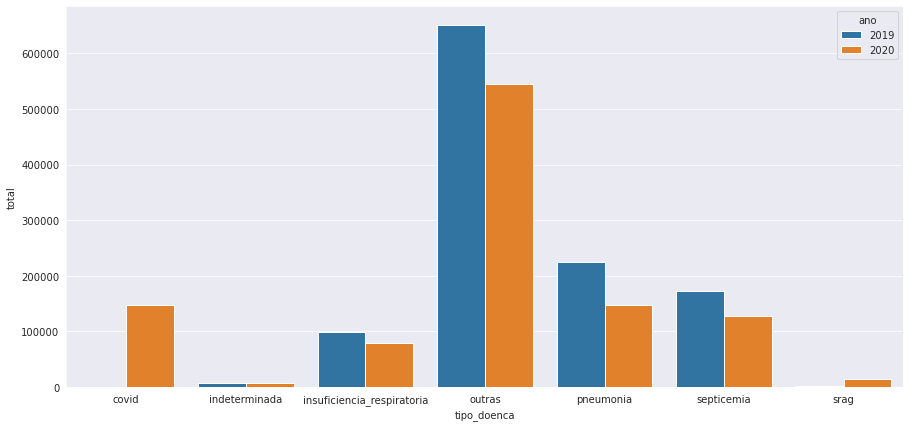

In [89]:
sns.barplot(x="tipo_doenca", y="total", hue="ano", data=cumulated_year);

### Cumulated distribution by state

In [38]:
df.uf.unique()

array(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG',
       'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'], dtype=object)

In [44]:
df.head()

,city,city_ibge_code,date,epidemiological_week,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
1,,35,2020-02-25,9,45919049.0,False,False,1,0.00218,2020-02-25,0.0,0,1,state,SP,1,0
3,,35,2020-02-26,9,45919049.0,False,False,1,0.00218,2020-02-26,0.0,0,2,state,SP,0,0
5,,35,2020-02-27,9,45919049.0,False,False,1,0.00218,2020-02-27,0.0,0,3,state,SP,0,0
7,,35,2020-02-28,9,45919049.0,False,False,2,0.00436,2020-02-28,0.0,0,4,state,SP,1,0
9,,35,2020-02-29,9,45919049.0,False,False,2,0.00436,2020-02-29,0.0,0,5,state,SP,0,0


In [105]:
cumulated_year_uf = df.groupby(['tipo_doenca', 'uf', 'ano']).agg({'total': 'sum'}).reset_index()

In [108]:
def plot_year_uf(uf):
    uf = uf
    data = cumulated_year_uf.query('uf == @uf')
    sns.barplot(x="tipo_doenca", y="total", hue="ano", data=data);
    return 

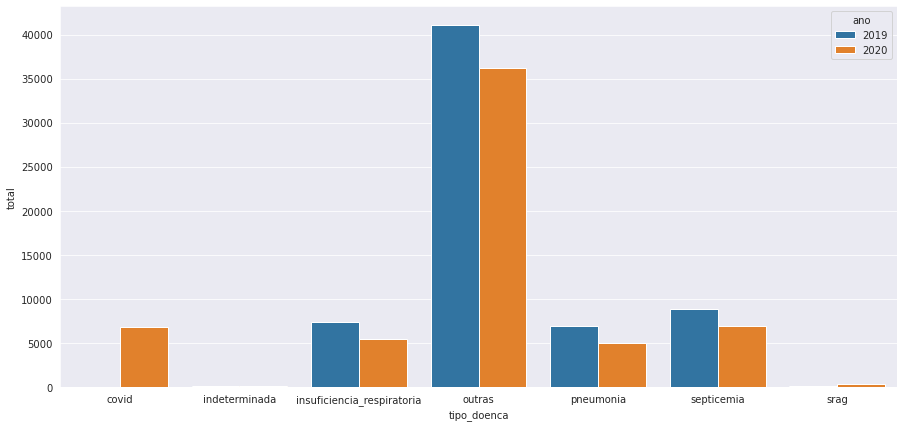

In [110]:
plot_year_uf('BA')

### Cumulated distribution by Helena

In [124]:
df_h = df.copy()
df_h.rename(columns={'faixa_etaria(anos)' : 'faixa_etaria'}, inplace=True)
df_h = df_h.query('tipo_doenca in ("srag", "insuficiencia_respiratoria")')
df_h2 = df_h.query('faixa_etaria in ("60 - 69", "70 - 79", "80 - 89", "90 - 99", "> 100")')
cumulated_year_h = df_h2.groupby(['tipo_doenca', 'ano']).agg({'total': 'sum'}).reset_index()
cumulated_year_h

,tipo_doenca,ano,total
0,insuficiencia_respiratoria,2019,74817
1,insuficiencia_respiratoria,2020,58810
2,srag,2019,761
3,srag,2020,10433


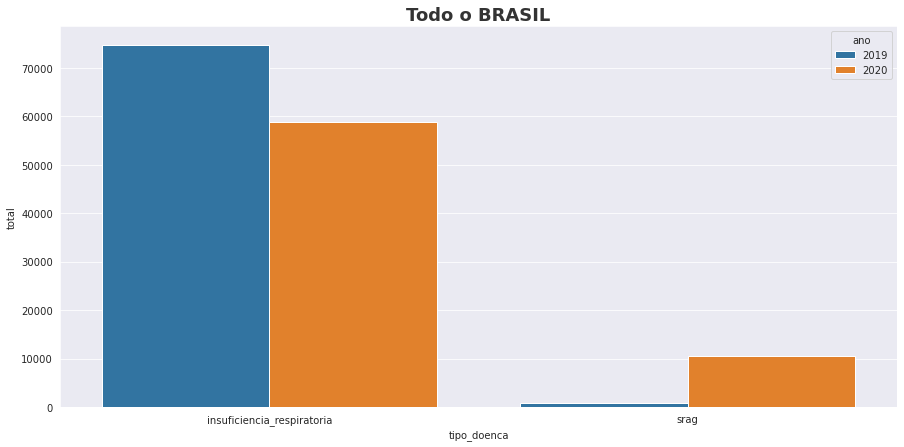

In [136]:
sns.barplot(x="tipo_doenca", y="total", hue="ano", data=cumulated_year_h)
plt.title('Todo o BRASIL', fontsize=18, fontweight='bold', color='#333333')
plt.show()

In [126]:
cumulated_year_uf_h = df_h2.groupby(['tipo_doenca', 'uf', 'ano']).agg({'total': 'sum'}).reset_index()
cumulated_year_uf_h

,tipo_doenca,uf,ano,total
0,insuficiencia_respiratoria,AC,2019,134
1,insuficiencia_respiratoria,AC,2020,121
2,insuficiencia_respiratoria,AL,2019,1110
3,insuficiencia_respiratoria,AL,2020,791
4,insuficiencia_respiratoria,AM,2019,356
...,...,...,...,...
103,srag,SE,2020,50
104,srag,SP,2019,150
105,srag,SP,2020,1532
106,srag,TO,2019,5


In [133]:
def plot_year_uf_h(uf):
    uf = uf
    data = cumulated_year_uf_h.query('uf == @uf')
    sns.barplot(x="tipo_doenca", y="total", hue="ano", data=data)
    plt.title('Estado de ' + uf, fontsize=18, fontweight='bold', color='#333333')
    plt.show()
    return 

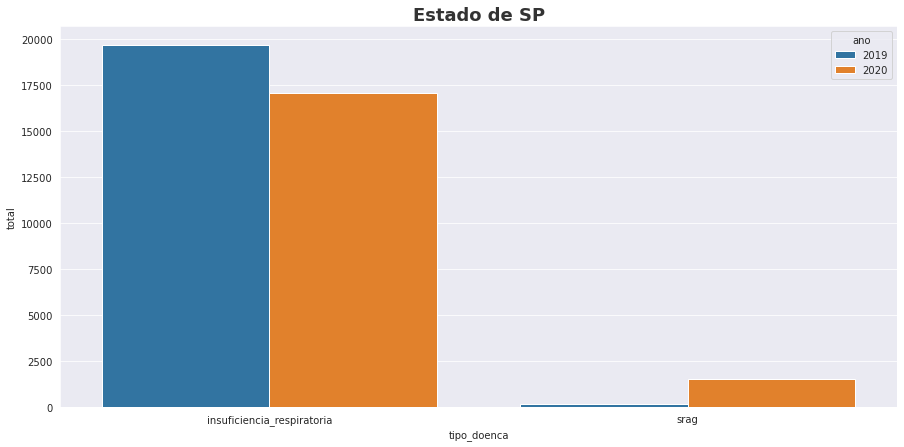

In [134]:
plot_year_uf_h('SP')

### Conclusion

#### ???

## *Developed by*

 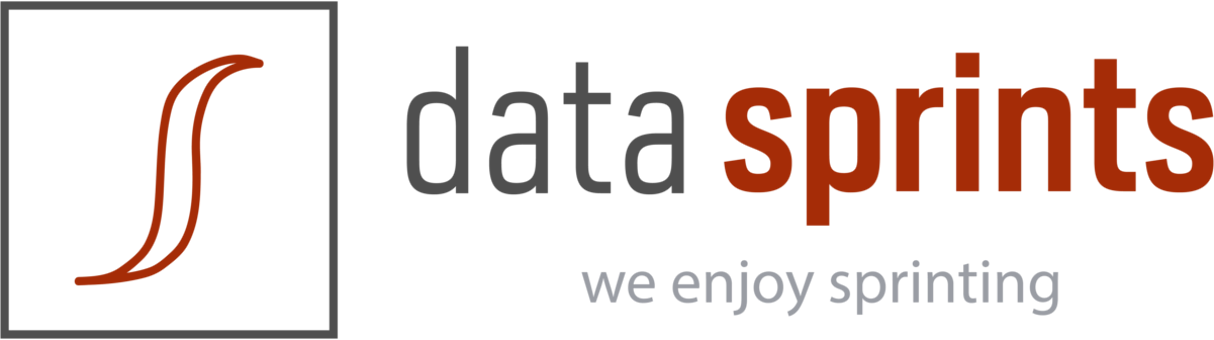